In [59]:
# Multi Layer Perceptron 
from sklearn.neural_network import MLPClassifier
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.tree import plot_tree

In [60]:
df = pd.read_csv('diabetes.csv')
cols = df.columns
X = df.drop('Outcome',axis=1)
y = df['Outcome']



In [61]:
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=44)
#3 hidden layer with 8  neurons model
mlp=MLPClassifier(hidden_layer_sizes=(8,8,8))

In [62]:
#min hidden layer max accuracy
mlp.fit(X_train,y_train)

C:\Users\Foram Solanki\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(8, 8, 8))

In [63]:
Y_pred=mlp.predict(X_test)

In [64]:
Y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [65]:
accuracy_score(y_test,Y_pred)

0.703125

In [68]:
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.model_selection import cross_val_score

cv_results = cross_validate(mlp,
                            X,
                            y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

cv_results['test_accuracy'].mean()

C:\Users\Foram Solanki\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Foram Solanki\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Foram Solanki\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.6626941685765215

In [69]:
cv_results['test_f1'].mean()

0.3929999871926133

In [70]:
cv_results['test_roc_auc'].mean()

0.6513574423480083

In [71]:
random_user = X.sample(1)

In [72]:
mlp.predict(random_user)

array([0], dtype=int64)

In [74]:
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
def dl_model(X,y):
    X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.3,random_state=42)
    dl_model=MLPClassifier().fit(X_train,y_train)
    y_pred=dl_model.predict(X_test)
    print('Test Confusion Matrix:\n', confusion_matrix(y_test,y_pred))
    print("Accuracy Score  : ", accuracy_score(y_test,y_pred))
    print("Cross Val Score  : ",cross_val_score(dl_model,X_test,y_test,cv=10).mean())
    print("Classification Report:\n",classification_report(y_test,y_pred))
    plot_confusion_matrix(dl_model, X_test, y_test)

Test Confusion Matrix:
 [[133  18]
 [ 49  31]]
Accuracy Score  :  0.70995670995671
Cross Val Score  :  0.6409420289855072
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.88      0.80       151
           1       0.63      0.39      0.48        80

    accuracy                           0.71       231
   macro avg       0.68      0.63      0.64       231
weighted avg       0.70      0.71      0.69       231



C:\Users\Foram Solanki\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


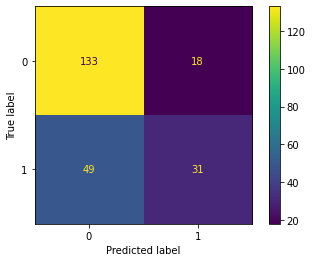

In [75]:
dl_model(X,y)